<a href="https://colab.research.google.com/github/Chahinezehallaci/Chahinezehallaci/blob/main/d%C3%A9faut_de_paiement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans le cadre du cours d'apprentissage statistique avancé, un travail sur la base de données des défauts de paiement a été demandé. Des analyses non supervisées ainsi que des méthodes supervisées ont été menées afin de définir des clusters / des classes. Les méthodes utilisées sont la MCA, FAMD, PLS et CCA.

In [ ]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4933ef38f4812b27e428a40e6fae19126e429f439db4a6bdb614be4045e32ba8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from google.colab import drive
import xlrd
import pandas as pd
import numpy as np

# maths & stats
from math import sqrt
import scipy.stats as st

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML
import prince
from sklearn.cross_decomposition import PLSRegression
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from pca import pca
from sklearn.cross_decomposition import CCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_K = pd.read_excel('/content/drive/MyDrive/Projet_Celisse/DataBank.xlsx') #KK

In [ ]:
df_K = pd.read_excel('/content/drive/MyDrive/Projet_Celisse/DataBank.xlsx') #KK
#df_K= pd.read_excel("/content/drive/MyDrive/Apprentissage_stat_final_project/DataBank.xlsx") #CH

In [ ]:
df_K.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [ ]:
df_K.shape

(5000, 23)

In [ ]:
df_K.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [ ]:
df_K.isna().sum().sum()

0

In [ ]:
df_K.duplicated().sum()

0

Il n'y a pas de valeurs manquantes, ni de dupliquées sur notre base originale.

In [ ]:
# Distribution de la variable d'intérêt
df_K.Default_On_Payment.value_counts(normalize=True)

0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

In [ ]:
df_K.Customer_ID.nunique()

5000

In [ ]:
df_K.Count.nunique()

1

- La colonne "Count" ne prend qu'une seule valeur égale à 1, on va donc la supprimer.
- La colonne "Customer_ID" prend des valeurs distinctes, on va également la supprimer.

In [ ]:
df_K.drop(['Count', 'Customer_ID'], axis=1, inplace=True)

In [ ]:
df_K.duplicated().sum()

4000

 En supprimant la colonne ID qui distingue les clients, on a 4/5 des observations dupliquées. En la gardant, l'analyse serait biaisée car il s'agirait des mêmes observations avec des ID différents. On va donc supprimer les valeurs dupliquées.

En supprimant les colonnes dupliquées, on perd beaucoup de données (4/5 de la base)!

In [ ]:
df_K.dtypes

Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

In [ ]:
df_K.describe()[1:].round(2)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16,0.30
std,12.05,2821.61,1.12,1.10,11.37,0.58,0.36,0.46
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00,0.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00,0.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00,0.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00,1.00


## Preprocessing

In [ ]:
# suppression du blanc dans le nom de la variable pour une meilleure manipulation des colonnes
df_K.rename(columns = {'Other_Inst_Plans ':'Other_Inst_Plans'}, inplace = True)

In [ ]:
df_K.Default_On_Payment.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

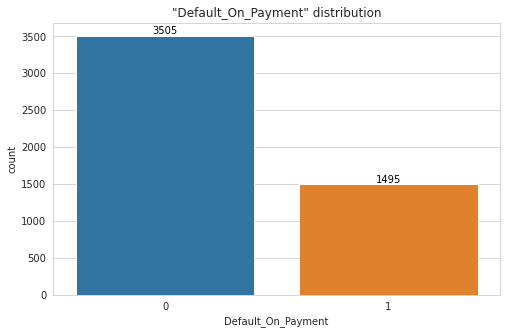

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
ax = sns.countplot(df_K['Default_On_Payment'])
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('"Default_On_Payment" distribution');

### Analyse de corrélation

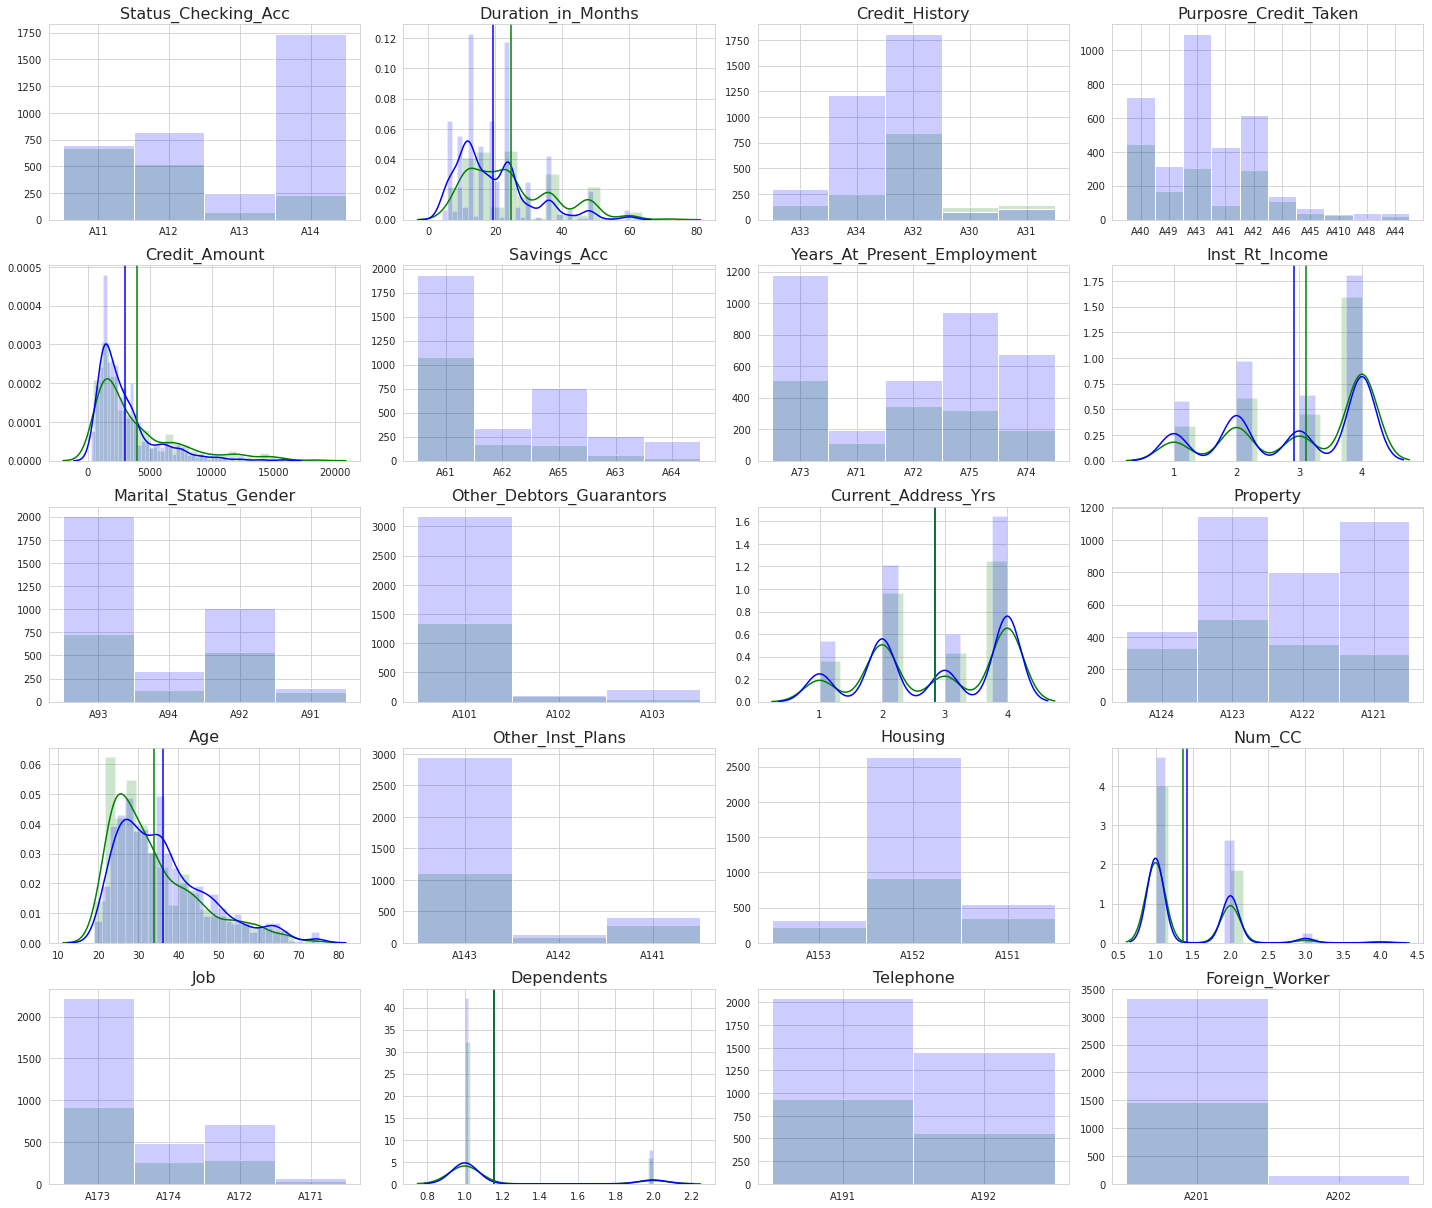

In [ ]:
plt.rcParams['figure.figsize']=(20, 20)
rows = 6; cols = 4
for index, (colname, serie) in enumerate(df_K.drop("Default_On_Payment",axis=1).iteritems()):
    plt.subplot(rows, cols, index + 1)
    serie1 = df_K[df_K['Default_On_Payment'].isin([0])][colname].dropna()
    serie2= df_K[df_K['Default_On_Payment'].isin([1])][colname].dropna()
    if (pd.api.types.is_float_dtype(serie1) or pd.api.types.is_integer_dtype(serie1)or pd.api.types.is_bool_dtype(serie1) ) is True:
        sns.distplot(serie2, hist_kws={"alpha":0.2, "color": "green"}, kde_kws={ "color": "green"})
        sns.distplot(serie1, hist_kws={"alpha":0.2, "color": "blue"}, kde_kws={ "color": "blue"})
        plt.axvline(np.mean(serie1), color='blue')
        plt.axvline(np.mean(serie2), color='green')
    elif (pd.api.types.is_object_dtype(serie1) ) is True:
        sns.histplot(serie2, alpha=0.2, color='green')
        sns.histplot(serie1, alpha=0.2, color='blue')
    plt.title(colname, fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()

En vert : distribution avec "Default_On_Payment" = 1 
En bleu : distribution avec "Default_On_Payment" = 0.

Nous obtenons exactement la même distribution pour les variables "Current_Address_Yrs" & "Dependants". Ces deux variables semblent ne pas être pertinentes pour distinguer les défauts de paiement des non défaut de paiement. 

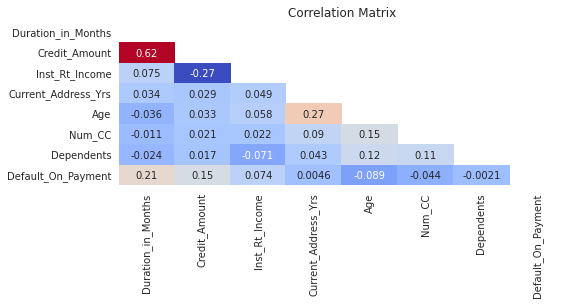

In [ ]:
corrmat = df_K.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,3))
sns.heatmap(df_K[top_corr_features].corr(),annot=True,cbar=False,cmap="coolwarm",
            mask=np.triu(np.ones_like(corrmat, dtype = bool))).set_title('Correlation Matrix');

La corrélation est ok.

### Distinction des variables catégorielles / variables numériques

In [ ]:
# liste de variables catégorielles
categori = []
for col in df_K.columns:
  if df_K[col].dtype == 'O':
    categori.append(col)

categori

['Status_Checking_Acc',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Other_Inst_Plans',
 'Housing',
 'Job',
 'Telephone',
 'Foreign_Worker']

In [ ]:
for col in categori:
    print(f"La variable\033[1m {col}\033[0m contient \033[1m{df_K[col].nunique()}\033[0m modalités.") 

La variable Status_Checking_Acc contient 4 modalités.
La variable Credit_History contient 5 modalités.
La variable Purposre_Credit_Taken contient 10 modalités.
La variable Savings_Acc contient 5 modalités.
La variable Years_At_Present_Employment contient 5 modalités.
La variable Marital_Status_Gender contient 4 modalités.
La variable Other_Debtors_Guarantors contient 3 modalités.
La variable Property contient 4 modalités.
La variable Other_Inst_Plans contient 3 modalités.
La variable Housing contient 3 modalités.
La variable Job contient 4 modalités.
La variable Telephone contient 2 modalités.
La variable Foreign_Worker contient 2 modalités.


La variable Savings account/bonds prend les modalités suivantes:
- A61: … < 1000 USD
- A62: 1000 <= … < 5000 USD
- A63: 5000 <= … < 10000 USD
- A64: .. >= 10000 USD
- A65: unknown/ no savings account

Nous allons effectuer une légère modification en remplacant A65 par A60 afin de garder un ordre croissant.

In [ ]:
df_K['Savings_Acc'] = df_K['Savings_Acc'].replace(to_replace='A65', value='A60')

In [ ]:
# Création d'une liste contenant les variables numériques
numeric = []
for col in df_K.columns:
  if df_K[col].dtype == 'int64':
    numeric.append(col)

numeric

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Dependents',
 'Default_On_Payment']

In [ ]:
for col in numeric:
    print(f"La variable\033[1m {col}\033[0m contient \033[1m{df_K[col].nunique()}\033[0m modalités.") 

La variable Duration_in_Months contient 33 modalités.
La variable Credit_Amount contient 921 modalités.
La variable Inst_Rt_Income contient 4 modalités.
La variable Current_Address_Yrs contient 4 modalités.
La variable Age contient 53 modalités.
La variable Num_CC contient 4 modalités.
La variable Dependents contient 2 modalités.
La variable Default_On_Payment contient 2 modalités.


### Analyse statistiques du lien entre les variables et la variable cible

Pour les variables catégorielles, utilisation d'un test du Chi2.

Hypothèse H0 : Les variables sont indépendantes

Hypothèse H1 : Les variables ne sont pas indépendantes

Si la valeur de la pvalue est inférieure à 5% on rejette l'hypothèse H0 avec un risque de 5%. On considère que les deux ne variables ne sont pas indépendantes

In [ ]:
# définir la variable cible
target = "Default_On_Payment"

In [ ]:
# Variables catégortielles test du Chi 2:
for v in categori:
    if v!=target:
        cont = df_K[[v, target]].pivot_table(index=v, columns=target, aggfunc=len).copy().astype(int) # Création de la table de contingence
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
        print(v + ": p-value test chi 2 = " + str(st_p))

Status_Checking_Acc: p-value test chi 2 = 4.303013251383359e-133
Credit_History: p-value test chi 2 = 1.8737802235783044e-65
Purposre_Credit_Taken: p-value test chi 2 = 3.9853766574504007e-32
Savings_Acc: p-value test chi 2 = 2.00523649726742e-37
Years_At_Present_Employment: p-value test chi 2 = 5.62120522966089e-19
Marital_Status_Gender: p-value test chi 2 = 6.541124539306941e-10
Other_Debtors_Guarantors: p-value test chi 2 = 5.880412344439788e-08
Property: p-value test chi 2 = 1.7024441180949943e-26
Other_Inst_Plans: p-value test chi 2 = 5.957741740776905e-15
Housing: p-value test chi 2 = 6.229982907206636e-21
Job: p-value test chi 2 = 0.02144242712356486
Telephone: p-value test chi 2 = 0.015419365665488065
Foreign_Worker: p-value test chi 2 = 1.2168500045697255e-08


--> Toutes les variables semblent pertinentes, toutes les pvalues sont inférieures à 0.05.

Pour les variables quantitatives, utilisation d'un test du Student. (Plus précisément Welch’s t-test parce qu'on ne considère pas que les 2 populations ont la même variance)

Hypothèse H0 : La distribution de la variable quantitative sachant target = 1 est la même que la distribution de la variable quantitative sachant target = 0

Hypothèse H1 : Les distributions sont différentes

Si la valeur de la pvalue est inférieure à 5% on rejette l'hypothèse H0 avec un risque de 5%. On considère que les distributions ne sont pas identiques

In [ ]:
for v in numeric[:-1]:
    if v!= target:
        a=list(df_K[df_K[target]==0][v])
        b=list(df_K[df_K[target]==1][v])
        st_test, st_p = st.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')
        print(v + ": p-value test Student = " + str(st_p))

Duration_in_Months: p-value test Student = 5.823408122771881e-44
Credit_Amount: p-value test Student = 1.1938239043380294e-20
Inst_Rt_Income: p-value test Student = 9.464709576262705e-08
Current_Address_Yrs: p-value test Student = 0.7415132907569059
Age: p-value test Student = 2.8636911730839055e-10
Num_CC: p-value test Student = 0.0014614019849832965
Dependents: p-value test Student = 0.8827845960651073


--> les variables Current_Address_Yrs et Dependents ont une pvalue supérieure à 0.05 elle n'est pas liée à la variable clible target / on retrouve cette remarque dans l'analyse visuel où la distribution si la variable cible = 1 est identique de la distribution où la variable cible = 0. Ces variables ne permettent pas de définir un défaut de paiement. 
Nous acceptons donc l'hypothèse H0.
Il serait donc plus intéréssant d'enlever d'enlever la variable qui a la p-value la plus élevée ( "Dependents") de la base de donnée et de recommencer ce test. 

In [ ]:
df_K.drop(['Dependents'], axis=1, inplace=True)

In [ ]:
# Nous recréons la liste contenant les variables numériques
numeric = []
for col in df_K.columns:
  if df_K[col].dtype == 'int64':
    numeric.append(col)

numeric

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Default_On_Payment']

In [ ]:
for v in numeric[:-1]:
    if v!= target:
        a=list(df_K[df_K[target]==0][v])
        b=list(df_K[df_K[target]==1][v])
        st_test, st_p = st.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')
        print(v + ": p-value test Student = " + str(st_p))

Duration_in_Months: p-value test Student = 5.823408122771881e-44
Credit_Amount: p-value test Student = 1.1938239043380294e-20
Inst_Rt_Income: p-value test Student = 9.464709576262705e-08
Current_Address_Yrs: p-value test Student = 0.7415132907569059
Age: p-value test Student = 2.8636911730839055e-10
Num_CC: p-value test Student = 0.0014614019849832965


--> la variables Current_Address_Yrs a toujours une pvalue supérieure à 0.05. 
Nous acceptons donc l'hypothèse H0: cette variable n'est pas liée à la variable clible défaut de paiement. 
Il serait donc plus intéréssant supprimer cette variable de la base de donnée. 

In [ ]:
df_K.drop(['Current_Address_Yrs'], axis=1, inplace=True)

In [ ]:
# Nous recréons la liste contenant les variables numériques
numeric = []
for col in df_K.columns:
  if df_K[col].dtype == 'int64':
    numeric.append(col)

numeric

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Age',
 'Num_CC',
 'Default_On_Payment']

In [ ]:
# Nous recommencons le test une dernière fois pour être sur qu'il n'y ait pas de nouvelle variables avec une p-val > 0.05
for v in numeric[:-1]:
    if v!= target:
        a=list(df_K[df_K[target]==0][v])
        b=list(df_K[df_K[target]==1][v])
        st_test, st_p = st.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='omit')
        print(v + ": p-value test Student = " + str(st_p))

Duration_in_Months: p-value test Student = 5.823408122771881e-44
Credit_Amount: p-value test Student = 1.1938239043380294e-20
Inst_Rt_Income: p-value test Student = 9.464709576262705e-08
Age: p-value test Student = 2.8636911730839055e-10
Num_CC: p-value test Student = 0.0014614019849832965


## MCA

In [ ]:
df_mca = df_K.copy()

In [ ]:
df_mca[numeric].head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Age,Num_CC,Default_On_Payment
0,6,1169,4,67,2,0
1,48,5951,2,22,1,0
2,12,2096,2,49,1,0
3,42,7882,2,45,1,0
4,24,4870,3,53,2,1


### Visualisation des variables continues

''

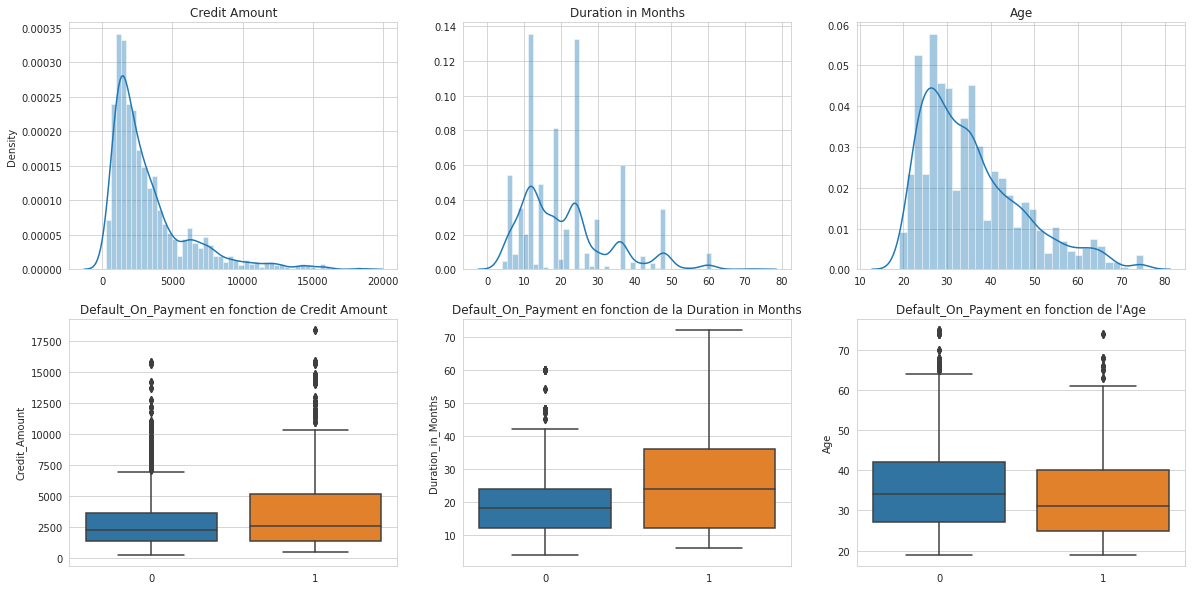

In [ ]:
fig,axes=plt.subplots(2,3, figsize=(20, 10))
sns.distplot(df_mca.Credit_Amount, hist = True, kde = True, ax=axes[0,0]).set_title('Credit Amount')
sns.distplot(df_mca.Duration_in_Months, hist = True, kde = True, ax=axes[0,1]).set_title('Duration in Months')
sns.distplot(df_mca.Age, hist = True, kde = True, ax=axes[0,2]).set_title('Age')

sns.boxplot(x=df_K.Default_On_Payment,y="Credit_Amount",data=df_K, ax=axes[1,0]).set_title('Default_On_Payment en fonction de Credit Amount')
sns.boxplot(x=df_K.Default_On_Payment,y="Duration_in_Months",data=df_K, ax=axes[1,1]).set_title('Default_On_Payment en fonction de la Duration in Months')
sns.boxplot(x=df_K.Default_On_Payment,y="Age",data=df_K , ax=axes[1,2]).set_title("Default_On_Payment en fonction de l'Age")

axes[0,1].set_ylabel(''), axes[0,2].set_ylabel('')
axes[0,0].set_xlabel(''), axes[0,1].set_xlabel(''), axes[0,2].set_xlabel('')
axes[1,0].set_xlabel(''), axes[1,1].set_xlabel(''), axes[1,2].set_xlabel('');

Le défaut de paiement concerne de manière générale une population plus jeune.
Les crédits présentant un défaut de paiement sont souvent les crédit dont le remboursement s'étend sur une plus longue période de temps. 
De plus, plus le montant du crédit est élevé et plus il y a un risque de défaut de paiement.

In [ ]:
df_mca[['Credit_Amount','Duration_in_Months','Age']].describe()[1:].round(2)

,Credit_Amount,Duration_in_Months,Age
mean,3271.26,20.90,35.55
std,2821.61,12.05,11.37
min,250.00,4.00,19.00
25%,1365.50,12.00,27.00
50%,2319.50,18.00,33.00
75%,3972.25,24.00,42.00
max,18424.00,72.00,75.00


### Catégorisation des variables quantitatives pour la mca 

#### Variables continues

In [ ]:
# Duration in Months
df_mca['Duration_in_Months'] = pd.cut(df_mca['Duration_in_Months'],
                                      bins=[0, 24, 48, 72],
                                      labels=['less than 2 years', '2-4 years', '4-6 years'])

# Credit Amount
df_mca['Credit_Amount'] = pd.cut(df_mca['Credit_Amount'],
                                 bins=[0, 5000, 10000, 20000],
                                 labels=['moderate', 'high', 'very high'])

# Age
df_mca['Age'] = pd.cut(df_mca['Age'],
                       bins=[0, 25, 55, 80],
                       labels=['young adult', 'adult', 'senior'])

In [ ]:
df_mca[numeric].head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Age,Num_CC,Default_On_Payment
0,less than 2 years,moderate,4,senior,2,0
1,2-4 years,high,2,young adult,1,0
2,less than 2 years,moderate,2,adult,1,0
3,2-4 years,high,2,adult,1,0
4,less than 2 years,moderate,3,adult,2,1


#### Variables discrètes

In [ ]:
for col in df_mca.columns:
  df_mca[col] = df_mca[col].astype("O")

In [ ]:
df_mca.dtypes

Status_Checking_Acc            object
Duration_in_Months             object
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                  object
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                 object
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Property                       object
Age                            object
Other_Inst_Plans               object
Housing                        object
Num_CC                         object
Job                            object
Telephone                      object
Foreign_Worker                 object
Default_On_Payment             object
dtype: object

### Application de l'ACM

In [ ]:
mca = prince.MCA(n_components=df_mca.shape[1], benzecri=False)
mca1 = mca.fit_transform(df_mca)

In [ ]:
mca1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.107526,-0.574687,0.434897,0.004295,-0.175118,-0.109844,0.118572,0.163178,0.307828,-0.307301,0.141722,0.237134,0.157496,0.203559,0.285889,-0.249527,-0.110538,0.101394,-0.042277
1,-0.197073,0.266808,-0.401448,-0.156803,0.059867,0.143866,-0.299079,0.317539,0.258055,0.090370,-0.370916,0.027294,0.428168,0.248181,0.010240,-0.025163,0.091702,-0.129383,0.138524
2,-0.175766,-0.344056,0.207023,0.082056,-0.140008,-0.037839,-0.190962,0.071324,-0.138474,0.069170,0.023674,-0.046069,0.381669,-0.062480,-0.055818,0.492978,0.342161,-0.109760,-0.148213
3,0.208072,0.260463,-0.166462,-0.006417,-0.311476,-0.257549,-0.423933,-0.480240,0.090162,0.183508,-0.864209,0.111692,0.278473,0.082314,0.067219,0.304411,0.385220,0.310314,0.351391
4,0.416383,0.146914,0.223306,0.356676,-0.494468,-0.246342,-0.285050,0.113649,-0.015800,0.265734,-0.100080,0.016173,-0.402743,-0.259487,-0.519748,0.123098,-0.312685,-0.189280,-0.291970


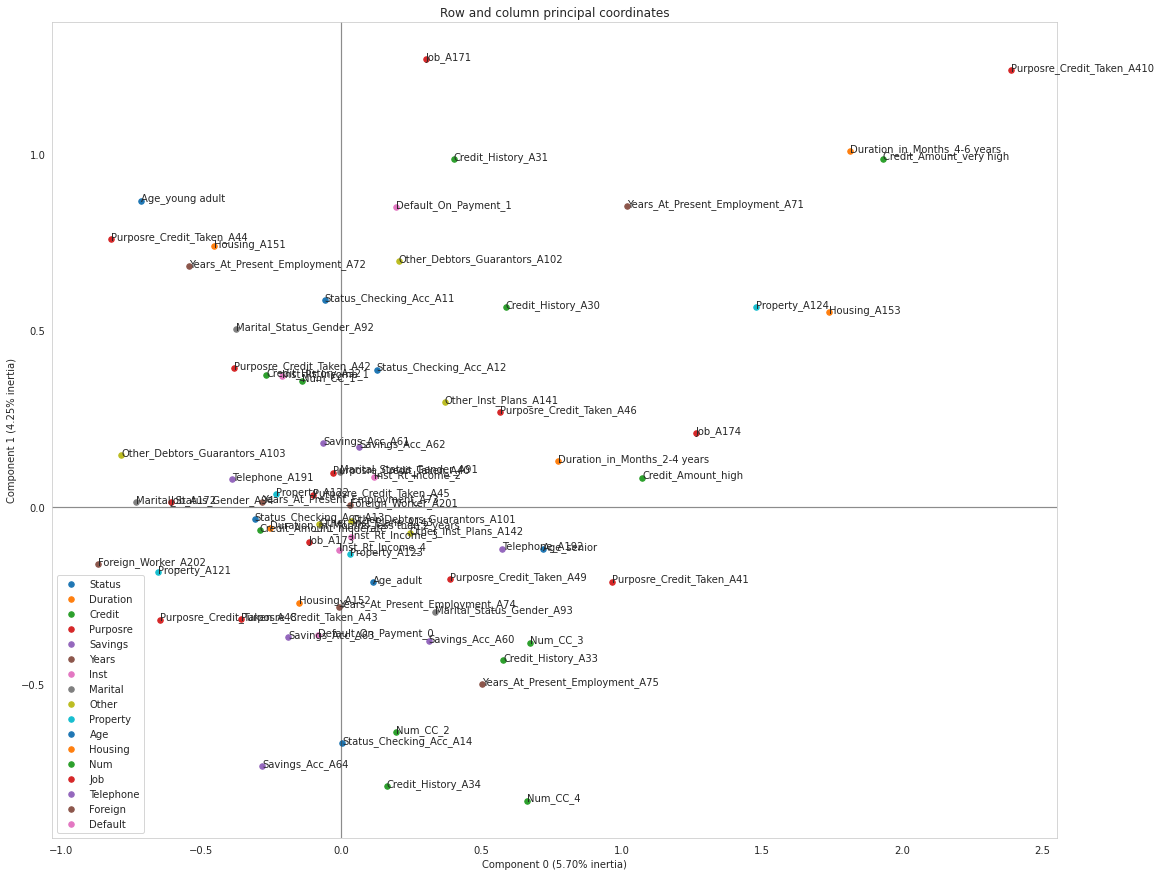

In [ ]:
mca.plot_coordinates(df_mca,
                     row_points_alpha=0.2,
                     figsize=(18, 15),
                     show_row_points=False,
                     show_column_labels=True
                    );

D'une part, on remarque que les personnes à risque de défaut bancaire sont les locataires (A151), les codemandeurs (A102), les clients à découvert (A11) ainsi que celles ayant remboursé tous les crédits de la banque (A31).
D'autre part, les personnes ayant plus de probabilité de ne pas finir en défaut bancaire sont celles ayant un compte d'épargne avec une comme de 5000 à 10000 USD (A63), les personnes ayant passé de 4 à 7 ans dans leur emploi actuel (A74), ayant pris un crédit pour une radio/télévision (A74), les propriétaires de leur logement (A152), les adultes de 25 à 55 ans ainsi que les personnes ayant séjourné dans leur adresse actuelle 2 ou 3 ans.

### Factor analysis of mixed data (FAMD) avec Prince

In [ ]:
df_K[categori].head(3)

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker
0,A11,A34,A43,A60,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201


In [ ]:
df_K[numeric].head(3)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Age,Num_CC,Default_On_Payment
0,6,1169,4,67,2,0
1,48,5951,2,22,1,0
2,12,2096,2,49,1,0


Dans la base de donnée df_K ous avons des variables quantitatives et qualitatives. 
Nous pouvons donc utiliser la FAMD. 
La FAMD consiste à appliquer l'ACP sur le tableau complet

In [ ]:
# Dans un premier temps nous utilisons la fonction FAMD de la librairie "Prince" 
famd = prince.FAMD(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )

famd = famd.fit(df_K)

In [ ]:
# La foncton "row_coordinates" renvoie les coordonnées globales de chaque observation.
famd.row_coordinates(df_K)

,0,1
0,-0.945566,2.476096
1,0.970953,-1.271139
2,-0.809367,0.704087
3,1.522933,-0.161321
4,1.168193,0.870500
...,...,...
4995,-1.152115,-0.516271
4996,0.565850,0.041128
4997,-1.076349,0.227193
4998,1.183372,-1.048338


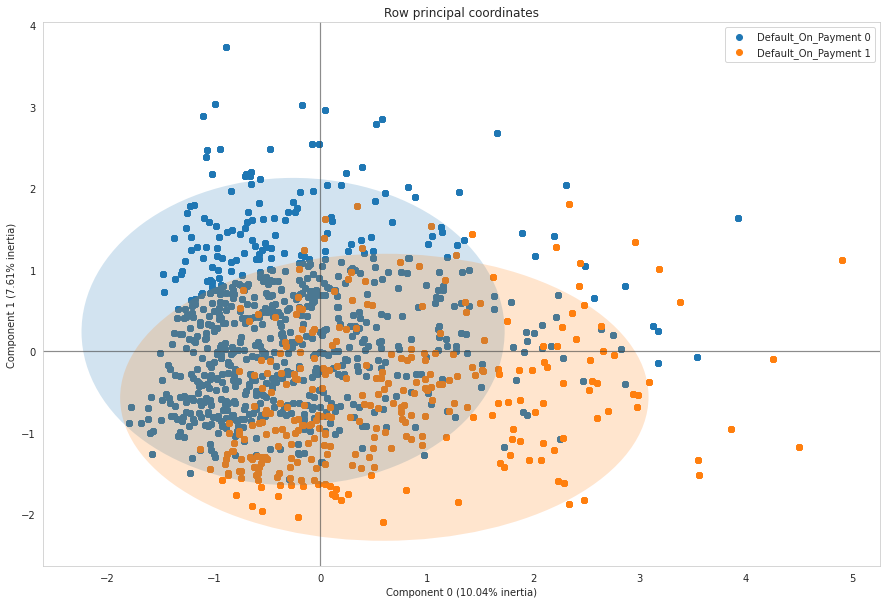

In [ ]:
#Nous représentons graphiquement dans un plan ces observations. 

ax = famd.plot_row_coordinates(
     df_K,
     ax=None,
     figsize=(15, 10),
     x_component=0,
     y_component=1,
     color_labels=['Default_On_Payment {}'.format(t) for t in df_K['Default_On_Payment']],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )

Sur la figure, les individus sont proches les uns des autres, le chevauchement est important entre les populations de clients qui présentent un "défaut de paiement" et un "non défaut de paiement".  

Nous constatons que beaucoup d'individus ont des profils similaires ( en termes de caractéristiques clients et de comportement d'achat). 

Cela suggère que s'il existe des /différences significatives entre les deux populations, elles sont probablement complexes et non linéaires.



### Factor analysis of mixed data (FAMD) classique 


Première étape : Compléter le tableau disjonctif

In [ ]:
# création des dummy variables pour les variables qualitatives 
df_famd = df_K.copy()
df_famd = pd.DataFrame(pd.get_dummies(df_famd[categori]))

# Nous considérons la variables Default_On_Payment comme une variable qualitative catégorielles car elles possèdent que très peu de modalités (2).
for col in df_K[numeric[5:]]:
  df_K[col] = df_K[col].astype("O")

# Transformons les en dummies
old_numerical = pd.DataFrame(pd.get_dummies(df_K[numeric[5:]]))

# Nous réduisons donc l'ensemble des variables numériques à Duration_in_Months, Credit_Amount, Inst_Rt_Income & Age
numerical = df_K[numeric[:5]]

# concaténation des tables coprennant les dummies avec la table comprenant les variables quantitatives
df_famd = pd.concat([numerical, df_famd, old_numerical], axis = 1)

Seconde étape : La Normalisation des  variables Quantitative avec les formules vues en cours



In [ ]:
df = df_famd.copy()

# Nous centrons les observations: retirer à chaque colonne (qui correspond à une variable) sa moyenne. 

df['Duration_in_Months']= df['Duration_in_Months']-np.mean(df['Duration_in_Months'])
df['Credit_Amount']= df['Credit_Amount']-np.mean(df['Credit_Amount'])
df['Inst_Rt_Income']= df['Inst_Rt_Income']-np.mean(df['Inst_Rt_Income'])
df['Age']= df['Age']-np.mean(df['Age'])
df['Num_CC']= df['Num_CC']-np.mean(df['Num_CC'])

# Nous réduisons les données en divisant chaque colonne de la matrice centrée par son écart-type empirique.

df = df.iloc[:,:5]/np.std(df.iloc[:,:5]) # reduction des données.
df_num_norm = df
# Méthode équivalente et plus rapide avec scikit learn
# df_famd_std = StandardScaler().fit_transform(df)

In [ ]:
df_num_norm.head(3)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Age,Num_CC
0,-1.236478,-0.745131,0.918477,2.766456,1.027079
1,2.248194,0.949817,-0.870183,-1.191404,-0.704926
2,-0.738668,-0.416562,-0.870183,1.183312,-0.704926


In [ ]:
# possibilité de le faire avec la librairie scikitlearn
df_famd_std = df_famd.iloc[:,:5]
df_famd_std = StandardScaler().fit_transform(df_famd_std)
df_famd_std # Nous obtenons le même résultat !

array([[-1.23647786, -0.74513141,  0.91847717,  2.76645648,  1.02707891],
       [ 2.24819436,  0.94981679, -0.87018333, -1.19140394, -0.704926  ],
       [-0.73866754, -0.41656241, -0.87018333,  1.18331231, -0.704926  ],
       ...,
       [-0.73866754, -0.87450324,  0.91847717,  0.21583532, -0.704926  ],
       [ 1.9992892 , -0.50552769,  0.91847717, -1.10345149, -0.704926  ],
       [ 1.9992892 ,  0.46245715,  0.02414692, -0.75164167, -0.704926  ]])

Troisième étape : La Normalisation des  variables Qualitatives catégorielles avec les formules du cours

Categorical variables:
> Replace $c_{i,j}$ by $\frac{c_{i,j}}{\sqrt{f_{+j}}}$

In [ ]:
df_cat = df_famd.iloc[:,5:] 

# Définition des paramètres vues en cours

Q = 14 # number of categories variables : 21 variables - 5 variables numériques encore en liste - 2 variables numériques supprimées
p = df_cat.shape[1] # total number of categories/modalities
n = len(df_cat) # nombre d'observations
nQ = n * Q # Total number of “1”s (5000 * 16)
C = np.asmatrix(df_cat)
F = C / nQ  # Frequency table

# frequency of modality j
fplus_j = [ ]
for j in range(0,len(df_cat.columns)):  
     fplus_j.append( (np.sum(df_cat.iloc[:,j]))/n )

fplus_j = np.asmatrix(fplus_j)

# Normalisation des données catégorielles

for j in range(0,len(df_cat.columns)):  
    for i in  range(0,len(df_cat)) :
      df_cat.iloc[i,j] = df_cat.iloc[i,j] / np.sqrt(fplus_j[0,j])

In [ ]:
df_cat_norm = df_cat.copy()
df_cat_norm.head(3) 

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202,Default_On_Payment_0,Default_On_Payment_1
0,1.910402,0.000000,0.0,0.000000,0,0.0,0.000000,0.0,1.847422,0.0,...,0.0,0.000000,1.259882,0.0,0.000000,1.573292,1.01903,0.0,1.194376,0.0
1,0.000000,1.928075,0.0,0.000000,0,0.0,1.373606,0.0,0.000000,0.0,...,0.0,0.000000,1.259882,0.0,1.295319,0.000000,1.01903,0.0,1.194376,0.0
2,0.000000,0.000000,0.0,1.593132,0,0.0,0.000000,0.0,1.847422,0.0,...,0.0,2.236068,0.000000,0.0,1.295319,0.000000,1.01903,0.0,1.194376,0.0


Nous trouvons un résutat qui semble plutôt correct. 

In [ ]:
# concaténation des données qualitatives et quantitatives normalisées

df_famd_norm = pd.concat([df_num_norm,df_cat_norm], axis = 1)
df_famd_norm.head(3)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Age,Num_CC,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,...,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202,Default_On_Payment_0,Default_On_Payment_1
0,-1.236478,-0.745131,0.918477,2.766456,1.027079,1.910402,0.000000,0.0,0.000000,0,...,0.0,0.000000,1.259882,0.0,0.000000,1.573292,1.01903,0.0,1.194376,0.0
1,2.248194,0.949817,-0.870183,-1.191404,-0.704926,0.000000,1.928075,0.0,0.000000,0,...,0.0,0.000000,1.259882,0.0,1.295319,0.000000,1.01903,0.0,1.194376,0.0
2,-0.738668,-0.416562,-0.870183,1.183312,-0.704926,0.000000,0.000000,0.0,1.593132,0,...,0.0,2.236068,0.000000,0.0,1.295319,0.000000,1.01903,0.0,1.194376,0.0


Quatrième step : Application de l'ACP des données centrées et réduites

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Components = pca.fit_transform(df_famd_norm)
Components # affichages des donnée sur les axes principaux

array([[ 1.09099978e-01,  3.76243937e+00,  8.63977608e-01, ...,
         1.04649353e-15,  3.48204221e-16, -8.00193787e-16],
       [-6.91541017e-01, -1.63442114e+00, -1.31059270e+00, ...,
         2.64555700e-16,  3.91497987e-16, -7.28956704e-17],
       [-9.09427801e-01,  2.02558437e+00,  8.02927280e-01, ...,
        -1.08298338e-16,  1.67400711e-16, -8.82399471e-17],
       ...,
       [-9.59115715e-01,  1.50874692e+00, -4.47618695e-01, ...,
        -7.22328473e-17, -2.17814772e-17, -2.09460330e-17],
       [ 2.03741964e+00, -1.45064221e+00,  1.12090132e+00, ...,
        -1.01497636e-16, -1.98355007e-17, -4.55416762e-18],
       [ 1.65919482e+00, -4.78516719e-01, -1.43010535e+00, ...,
        -7.15450029e-17,  2.06731681e-17,  3.20166828e-17]])

Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [ ]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(0, len(df_famd_norm.columns))], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig.head(10)

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.172917,7.0,7.0
1,Dim2,2.287666,5.0,12.0
2,Dim3,1.941483,4.0,16.0
3,Dim4,1.678303,4.0,19.0
4,Dim5,1.620771,3.0,23.0
5,Dim6,1.487954,3.0,26.0
6,Dim7,1.413322,3.0,29.0
7,Dim8,1.362483,3.0,32.0
8,Dim9,1.301761,3.0,35.0
9,Dim10,1.284763,3.0,37.0


L'idée est de représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).



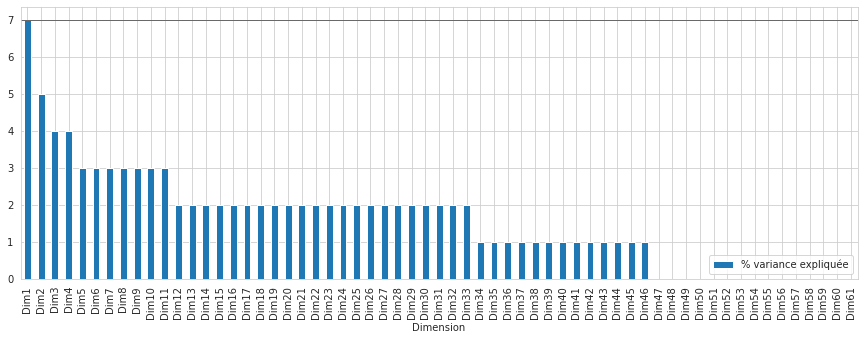

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.axhline(y = 7, linewidth = 1, color = "dimgray", linestyle = "-") 
plt.show()

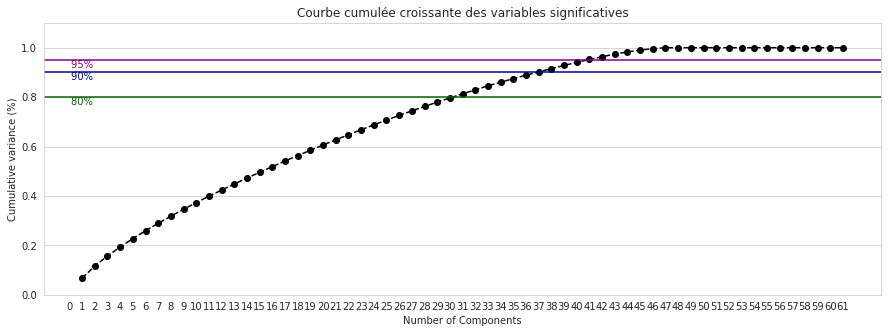

In [ ]:
#PCA
plt.rcParams["figure.figsize"] = (15,5)

fig, ax = plt.subplots()
xi = np.arange(1, ((pd.DataFrame(df_famd_norm)).shape[1]+1), step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, ((pd.DataFrame(df_famd_norm)).shape[1]+1), step=1))
plt.ylabel('Cumulative variance (%)')

plt.axhline(y=0.95, color='purple', linestyle='-')
plt.text(0.1, 0.92, '95% ', color = 'purple', fontsize=10)

plt.axhline(y=0.90, color='darkblue', linestyle='-')
plt.text(0.1, 0.87, '90% ', color = 'darkblue', fontsize=10)

plt.axhline(y=0.80, color='darkgreen', linestyle='-')
plt.text(0.1, 0.77, '80% ', color = 'darkgreen', fontsize=10)

ax.grid(axis='x')
plt.title('Courbe cumulée croissante des variables significatives');

Nous montrons ici comment la variable expliquée augmente avec le nombre de composants, et nous ajoutons des indicateurs pour montrer les valeurs à 80%, 90% et 95%.

Les 32 facteurs principaux permettent d'expliquer 80% de la variabilité de la variable à expliquer.

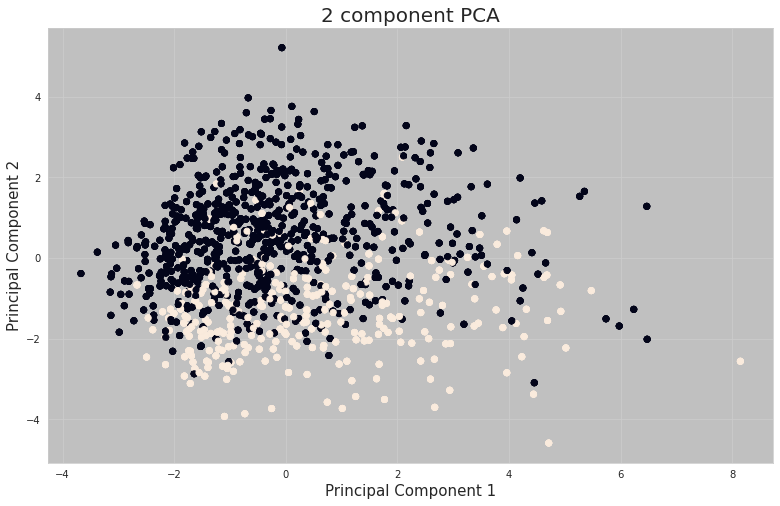

In [ ]:
principaldf = pd.DataFrame(data = Components, columns = df_famd_norm.columns)
fig = plt.figure(figsize = (13,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principaldf[df_famd_norm.columns[0]], principaldf[df_famd_norm.columns[1]], c=df_famd_norm.Default_On_Payment_1)
ax.set_facecolor('silver');

Nous obtenons la même figure qu'avec la librairie prince pour la FAMD. 

In [ ]:
model = pca()

# Fit transform with dataframe
results = model.fit_transform(df_famd_norm)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [61] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [41] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [61] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[41]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
# Biplot with the loadings
model.results['topfeat']

,PC,feature,loading,type
0,PC1,Credit_Amount,0.375876,best
1,PC2,Age,0.327901,best
2,PC3,Housing_A153,0.298750,best
3,PC4,Num_CC,0.414727,best
4,PC5,Years_At_Present_Employment_A71,0.418250,best
...,...,...,...,...
67,PC38,Telephone_A191,0.199809,weak
68,PC38,Telephone_A192,-0.242688,weak
69,PC30,Foreign_Worker_A201,-0.086519,weak
70,PC2,Default_On_Payment_0,0.195683,weak


[pca] >Plot PC1 vs PC2 with loadings.


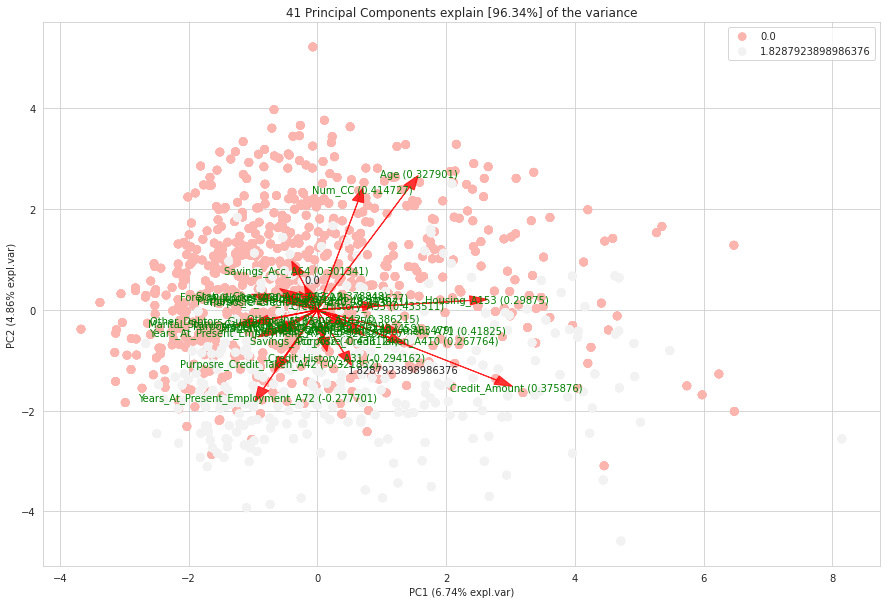

In [ ]:
# 2D plot with samples colored on color_intensity
model.biplot(y=df_famd_norm['Default_On_Payment_1'].values, legend=True, cmap='Pastel1');

- On voit que les variables qui permettent le mieux de distinguer un défaut de paiement sont les variables Credit Amount, Age, Years at present employment et Housing.
- Les flèches qui se dirigent en bas à droite sont les variables indicatrices de non-défaut de paiement par exemple la variable A31 (Credit History paid back duly), A153 (Housing for free) et A42 (Purpose furniture/equipment).

### Clustering avec la FAMD appliquée à notre jeu de donnée contenant des variables qualitatives et quantitatives

Nous allons utiliser une méthode non supervisée pour définir les différents clusters de "défaut de paiement" contenues dans notre base de donnée. 
Mais avant cela effectuons une réduction de dimension avec l'ACP (passage de 62 à 32 variables).

In [ ]:
# Train/test split
df_famd_norm_train, df_famd_norm_test = train_test_split(df_famd_norm, test_size=0.3, random_state=42) # 70% training et 30% test

In [ ]:
pca = PCA(n_components = 32) # nous avons vu précèdemment que 32 composantes principales expliquaient plus de 80% de la variable à expliquer

In [ ]:
X_train_famd = pd.DataFrame(pca.fit_transform(df_famd_norm_train))
X_test_famd = pd.DataFrame(pca.transform(df_famd_norm_test))

Après avoir appliqué l'ACP(80%), 32 composantes normalisées sont obtenues.



Le clustering est utilisé comme une méthode non supervisée pour regrouper les données. Deux types de regroupements sont utilisés:
1. le GMM utilise des distributions gaussiennes qui sont mises à jour en fonction de la probabilité d'appartenance à un cluster.
2. K-means basé sur la distance entre le centroïde et chacun des points.

In [ ]:
Sum_bic = []
Sum_aic = []

n_clusters = range(1,20)
for i in n_clusters:
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0).fit(X_train_famd)
    Sum_bic.append(gmm.bic(X_train_famd))
    Sum_aic.append(gmm.aic(X_train_famd))

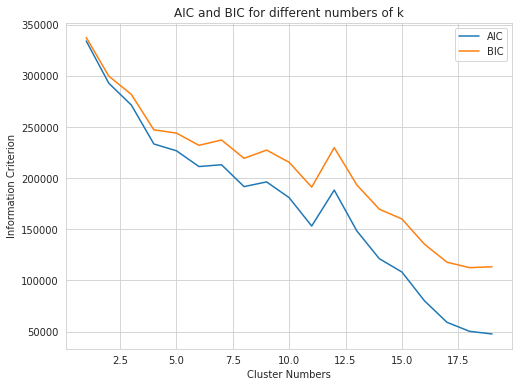

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(n_clusters, Sum_aic, label = "AIC")

plt.plot(n_clusters, Sum_bic, label = "BIC")

plt.title("AIC and BIC for different numbers of k")
plt.xlabel("Cluster Numbers")
plt.ylabel("Information Criterion")
plt.legend(loc='upper right')
plt.show()

Nous essayons de trouver le nombre optimal de distributions qui décrivent le mieux les clusters en partant de 1 jusqu'à 20. Le BIC et l'AIC sont des métriques pour la sélection de modèles. Le BIC est plus strict car il pénalise les paramètres utilisés pour l'estimation, c'est-à-dire que plus le modèle est complexe, plus il pénalise.Nous voyons que le comportement est un peu erratique et qu'à chaque fois que le nombre de clusters augmente, la valeur du critère diminue (en se séparant légèrement au fur et à mesure que le nombre de clusters augmente, c'est-à-dire le nombre de paramètres à estimer), mais avec quelques pics. On pourrait dire que 3 est un nombre "optimal" de cluster

**Graphiquement**

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0:1], X.iloc[:, 1:2], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0:1], X.iloc[:, 1:2], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

On utilise la function de Michael Fuchs pour graphiquer les données en 2 dimension (https://michael-fuchs-python.netlify.app/2020/06/24/gaussian-mixture-models/).

On a choisi 2 clusters pour le graphique car selon le critère BIC, c'est un premier point où la descente du gradient au fur et à mesure que le nombre de clusters augmente ne diminue pas beaucoup.

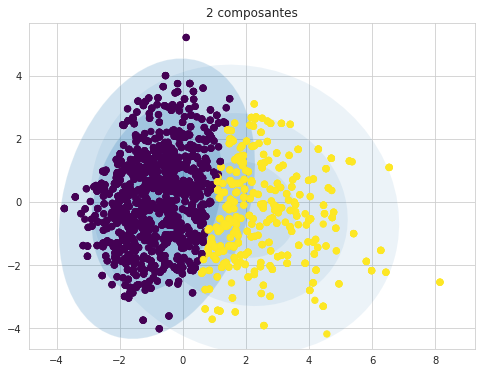

In [ ]:
X_graph=X_train_famd.iloc[:, 0:2]
gmm_2= GaussianMixture(n_components=2, covariance_type='full',  random_state=5)
plot_gmm(gmm_2, X_graph)
plt.title("2 composantes");

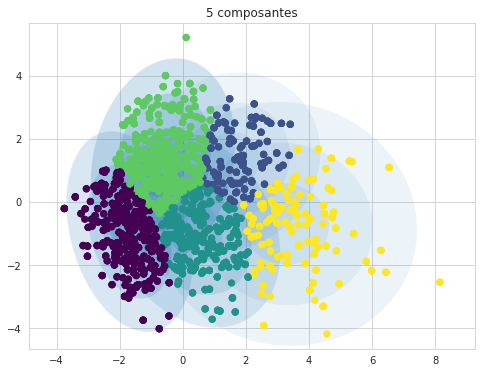

In [ ]:
gmm_5= GaussianMixture(n_components=5, covariance_type='full',  random_state=5)
plot_gmm(gmm_5, X_graph)
plt.title("5 composantes");

**2. K-Means**

In [ ]:
Sum_of_squared_distances=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train_famd)
    Sum_of_squared_distances.append(km.inertia_)

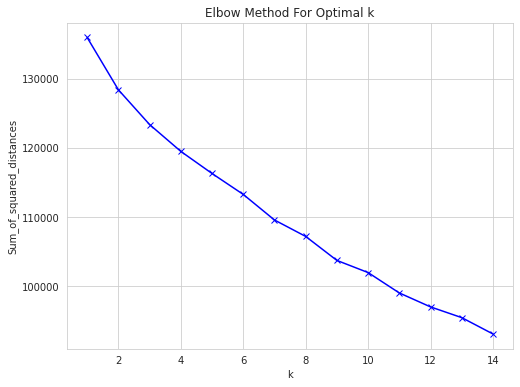

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Pour la comparaison avec une autre méthode de clustering, nous utilisons K-Means. Comme avec le GMM, on n'observe pas un nombre optimal de clusters, on pourrait dire qu'un nombre plus grand a une tendance à être meilleur, presque comme si chaque élément de données était un cluster en soi.

## PSL

In [ ]:
df_pls = df_K.copy()

In [ ]:
df_pls['Default_On_Payment'] = np.where(df_pls['Default_On_Payment'] == 1, 'yes', 'no')

In [ ]:
numerical_features = numeric.remove('Default_On_Payment')

In [ ]:
categorical_features = categori.append('Default_On_Payment')

In [ ]:
df_pls = pd.get_dummies(df_pls, prefix_sep='_', dummy_na=False, 
                        columns = categorical_features, 
                        sparse=False, drop_first=False, dtype=None)

In [ ]:
df_pls = pd.DataFrame(StandardScaler().fit_transform(df_pls.values),
                      index=df_pls.index,
                      columns=df_pls.columns)

In [ ]:
Y = df_pls[['Default_On_Payment_no', 'Default_On_Payment_yes']]

In [ ]:
X = df_pls.drop(['Default_On_Payment_no', 'Default_On_Payment_yes'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, stratify=Y, random_state=19)

2.132174679683333 1


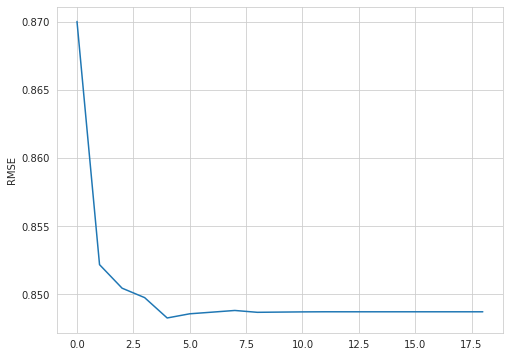

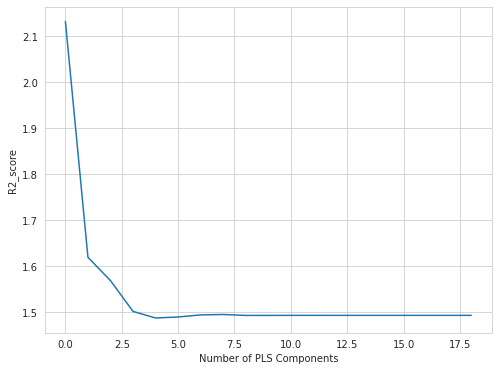

In [ ]:
plot_rmse = []
plot_r2 = []
plot_mse = []

best_ncmop = 0
best_rmse = 0
best_r2 = 0

for n_comp in range(1, 20):
    pls = PLSRegression(n_components=n_comp, scale=False)
    pls.fit_transform(X_train, y_train)
    y_hat = pls.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_hat))
    r2 = r2_score(y_hat, y_test)*-1
    
    plot_rmse.append(rmse)
    plot_r2.append(r2)
    
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

    
plt.plot(plot_rmse)
plt.ylabel('RMSE')
plt.show()

plt.plot(plot_r2)
plt.ylabel('R2_score')
plt.xlabel('Number of PLS Components')
plt.show()

Nous avons le même nombre optimal de composantes en utilisant le RMSE et le R2 score comme critères.

Nous utilisons deux composants pour faire le graphique suivant:

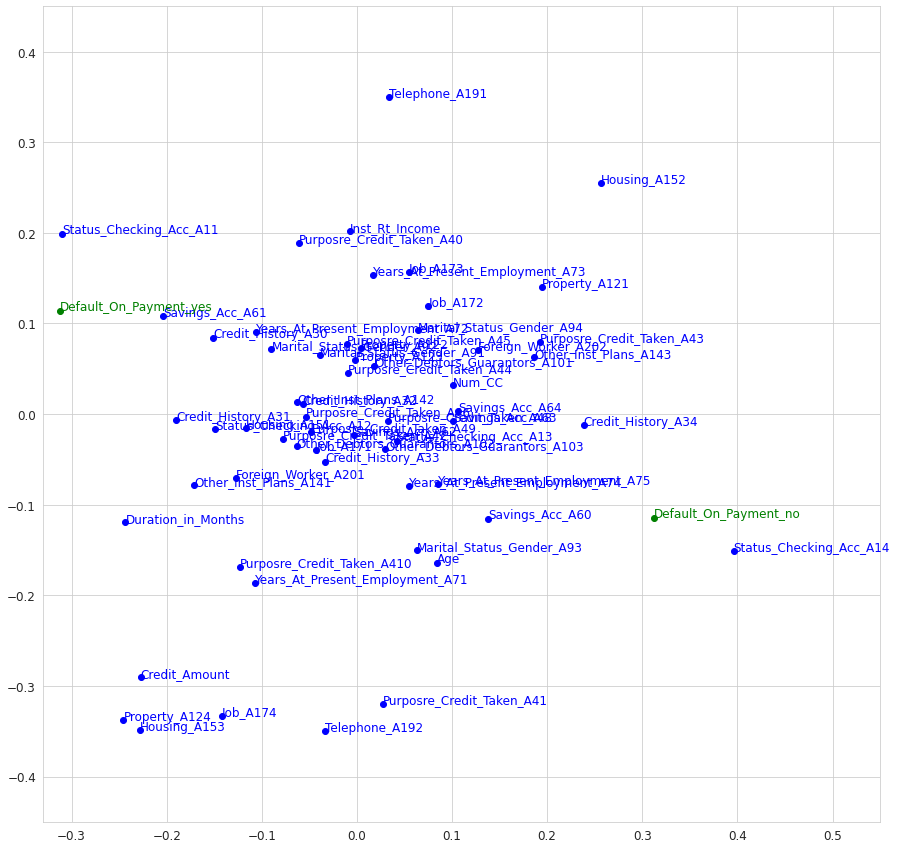

In [ ]:
plt.rcParams.update({'font.size': 12})

pls = PLSRegression(n_components=2, scale=True)
pls.fit_transform(X_train, y_train)


scores = pd.DataFrame(pls.x_scores_)
scores_dim1 = scores[0]
scores_dim2 = scores[1]

loadings = pd.DataFrame(pls.x_loadings_)
loadings_y = pd.DataFrame(pls.y_loadings_)



plt.figure(figsize=(15, 15))
plt.xlim((-0.33,0.55))
plt.ylim((-0.45,0.45))

for i, var_i in enumerate(X.columns):
    x = loadings.loc[i, 0]
    y = loadings.loc[i, 1]
    
    plt.scatter(x,y, color = 'blue')
    #plt.arrow(-0.32,-0.11,0.32+x,0.11+y, color = 'gray', linewidth=0.00001)
    plt.text(x,y,var_i, color = 'blue', rotation=0)
    
for i, var_i in enumerate(Y.columns):
    x = loadings_y.loc[i, 0]
    y = loadings_y.loc[i, 1]
    
    plt.scatter(x,y, color = 'green')
    plt.text(x,y,var_i, color = 'green') 
      
plt.show()

Nous constatons que les personnes les plus susceptibles de faire défaut sont celles qui ont moins de 1000 dollars sur leur compte d'épargne (A61) et qui ont un solde négatif sur leur compte bancaire (A11), et celles qui occupent leur emploi actuel depuis moins d'un an sont les plus susceptibles de faire défaut (A72). Étrangement, ceux qui ont remboursé tous leurs emprunts auprès de la banque ou d'autres organismes, ou qui n'ont pas emprunté du tout, sont également plus susceptibles d'être en défaut de paiement (A30 et A31).

En revanche, ceux qui travaillent plus de 7 ans dans  le même entreprise (A75), qui n'ont pas de compte d'épargne (A14), , sont les plus éloignés d'être en défaut de paiement. Il est également important de mentionner que plus le montant est élevé et plus la personne est âgée, plus la probabilité de défaut est faible.

## CCA

In [ ]:
df_pls.shape

(5000, 61)

In [ ]:
Y = df_pls[['Default_On_Payment_no', 'Default_On_Payment_yes', 'Marital_Status_Gender_A91',
       'Marital_Status_Gender_A92', 'Marital_Status_Gender_A93',
       'Marital_Status_Gender_A94']]
X = df_pls.drop(['Default_On_Payment_no', 'Default_On_Payment_yes','Marital_Status_Gender_A91',
       'Marital_Status_Gender_A92', 'Marital_Status_Gender_A93',
       'Marital_Status_Gender_A94'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, stratify=Y, random_state=19)

In [ ]:
my_cca = CCA(n_components=3, scale=True) # Centré et reduit
my_cca.fit(X_train, y_train)
X_c, Y_c = my_cca.transform(X_test, y_test)

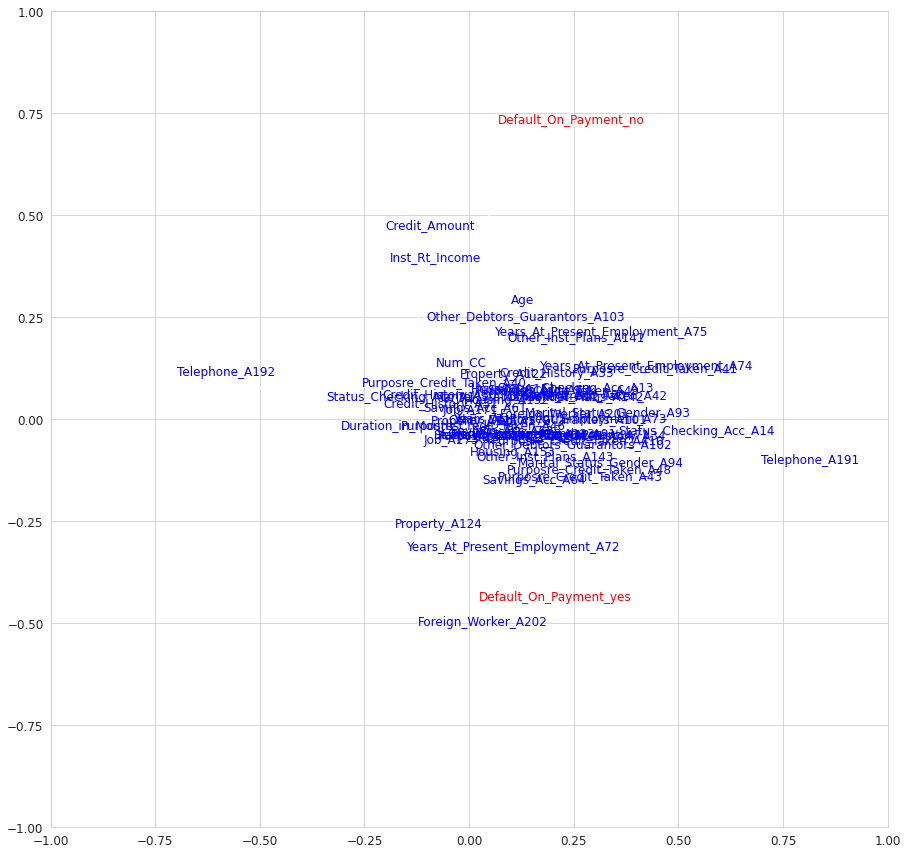

In [ ]:
# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_

# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))

# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
    x = xyrot[var_i,0]
    y = xyrot[var_i,1]
    plt.arrow(0,0,x,y)
    plt.text(x,y, df_pls.columns[var_i], color='red' if var_i >= 59 else 'blue')

plt.show()